In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('data.csv')

In [32]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [33]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [34]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [35]:
#num_df with drop of id column
num_df = df.select_dtypes([np.number])

In [37]:
def outliers(df, ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr
    ls = df.index[(df[ft] > ub) | (df[ft] < lb)]
    return ls

def replace_outliers_with_mean(df, ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr

    outliers_indices = df.index[(df[ft] >= ub) | (df[ft] <= lb)]


    df.loc[outliers_indices, ft] = df[ft].mean()

    return df

index_ls = []

for i in num_df.columns:
    index_ls.extend(outliers(num_df, i))
print(index_ls)

for i in num_df.columns:
    df = replace_outliers_with_mean(num_df, i)

[2, 3, 4, 7, 9, 11, 14, 15, 17, 32, 44, 46, 55, 64, 86, 87, 132, 147, 148, 150, 151, 170, 177, 194, 210, 213, 219, 225, 226, 227, 228, 231, 232, 233, 235, 236, 239, 240, 243, 248, 251, 256, 259, 265, 289, 290, 302, 311, 312, 324, 325, 335, 344, 359, 360, 390, 396, 397, 400, 408, 417, 428, 429, 442, 449, 460, 461, 463, 464, 490, 491, 506, 507, 514, 521, 526, 527, 531, 532, 533, 536, 82, 108, 122, 164, 180, 202, 212, 236, 339, 352, 369, 461, 503, 521, 219, 232, 239, 259, 265, 455, 562, 82, 108, 122, 164, 180, 202, 212, 236, 339, 352, 461, 503, 521, 23, 82, 108, 122, 164, 180, 202, 212, 236, 250, 265, 272, 339, 352, 368, 369, 372, 373, 393, 449, 461, 503, 521, 563, 564, 3, 105, 122, 504, 520, 568, 0, 3, 9, 12, 14, 78, 82, 108, 122, 181, 190, 258, 351, 352, 400, 567, 0, 68, 78, 82, 108, 112, 122, 152, 180, 202, 212, 258, 351, 352, 400, 461, 563, 567, 78, 82, 108, 122, 180, 202, 212, 352, 393, 461, 3, 22, 25, 60, 78, 108, 122, 146, 150, 152, 258, 288, 323, 424, 561, 3, 9, 68, 71, 78, 151, 1

In [38]:
num_df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,8.423020e+05,17.99,10.38,122.80,1001.0,0.11840,0.104341,0.088799,0.14710,0.241900,...,17.33,184.60,880.583128,0.162200,0.254265,0.7119,0.2654,0.290076,0.118900,NaN
1,8.425170e+05,20.57,17.77,132.90,1326.0,0.08474,0.078640,0.086900,0.07017,0.181200,...,23.41,158.80,880.583128,0.123800,0.186600,0.2416,0.1860,0.275000,0.089020,NaN
2,6.474288e+06,19.69,21.25,130.00,1203.0,0.10960,0.159900,0.197400,0.12790,0.206900,...,25.53,152.50,1709.000000,0.144400,0.424500,0.4504,0.2430,0.361300,0.087580,NaN
3,6.474288e+06,11.42,20.38,77.58,386.1,0.09636,0.104341,0.241400,0.10520,0.181162,...,26.50,98.87,567.700000,0.132369,0.254265,0.6869,0.2575,0.290076,0.083946,NaN
4,6.474288e+06,20.29,14.34,135.10,1297.0,0.10030,0.132800,0.198000,0.10430,0.180900,...,16.67,152.20,1575.000000,0.137400,0.205000,0.4000,0.1625,0.236400,0.076780,NaN


In [39]:
obj_df.isna().sum()

diagnosis    0
dtype: int64

In [40]:
#label encoding
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
label_obj = obj_df.apply(lb.fit_transform)

In [41]:
label_obj.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [42]:
num_df.shape

(569, 32)

In [45]:
#concat label_obj and processed_df
final_df = pd.concat([label_obj, num_df], axis=1)

In [46]:
final_df.head().T

,0,1,2,3,4
diagnosis,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
id,842302.000000,842517.000000,6.474288e+06,6.474288e+06,6.474288e+06
radius_mean,17.990000,20.570000,1.969000e+01,1.142000e+01,2.029000e+01
texture_mean,10.380000,17.770000,2.125000e+01,2.038000e+01,1.434000e+01
perimeter_mean,122.800000,132.900000,1.300000e+02,7.758000e+01,1.351000e+02
area_mean,1001.000000,1326.000000,1.203000e+03,3.861000e+02,1.297000e+03
smoothness_mean,0.118400,0.084740,1.096000e-01,9.636028e-02,1.003000e-01
compactness_mean,0.104341,0.078640,1.599000e-01,1.043410e-01,1.328000e-01
concavity_mean,0.088799,0.086900,1.974000e-01,2.414000e-01,1.980000e-01
concave points_mean,0.147100,0.070170,1.279000e-01,1.052000e-01,1.043000e-01


In [47]:
final_df = final_df.drop(['id', 'Unnamed: 32'], axis=1)

In [49]:
final_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [50]:
#quantile transformation
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer()
qt_df = qt.fit_transform(final_df)

c:\Users\Ashish Gaurav\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (569). n_quantiles is set to n_samples.
  warnings.warn(


In [51]:
qt_df = pd.DataFrame(qt_df, columns=final_df.columns)

In [52]:
qt_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.860915,0.001761,0.887324,0.883803,0.954225,0.587148,0.625880,0.990317,0.998239,...,0.975352,0.077465,0.997359,0.707746,0.911972,0.625880,0.989437,0.985915,0.586268,0.989437
1,1.0,0.973592,0.390845,0.951585,1.000000,0.216549,0.389085,0.602113,0.757042,0.561620,...,0.964789,0.392606,0.930458,0.707746,0.360915,0.406690,0.524648,0.836268,0.445423,0.742958
2,1.0,0.936620,0.708627,0.932218,0.950704,0.848592,0.888204,0.923415,0.971831,0.863556,...,0.927817,0.517606,0.911972,0.968310,0.741197,0.911972,0.843310,0.957746,0.944542,0.716549
3,1.0,0.205986,0.651408,0.302817,0.174296,0.511444,0.587148,0.977113,0.929577,0.547535,...,0.492958,0.600352,0.517606,0.355634,0.519366,0.625880,0.973592,0.978873,0.586268,0.634683
4,1.0,0.959507,0.110915,0.970070,0.987676,0.636444,0.802817,0.927817,0.926937,0.528169,...,0.894366,0.051056,0.905810,0.927817,0.604754,0.475352,0.799296,0.752641,0.157570,0.396127


In [53]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = qt_df.drop('diagnosis', axis=1)
y = qt_df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [55]:
y_pred = logreg.predict(X_test)

accuracy_score(y_test, y_pred)

0.9824561403508771

In [56]:
#r2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9253193580085162

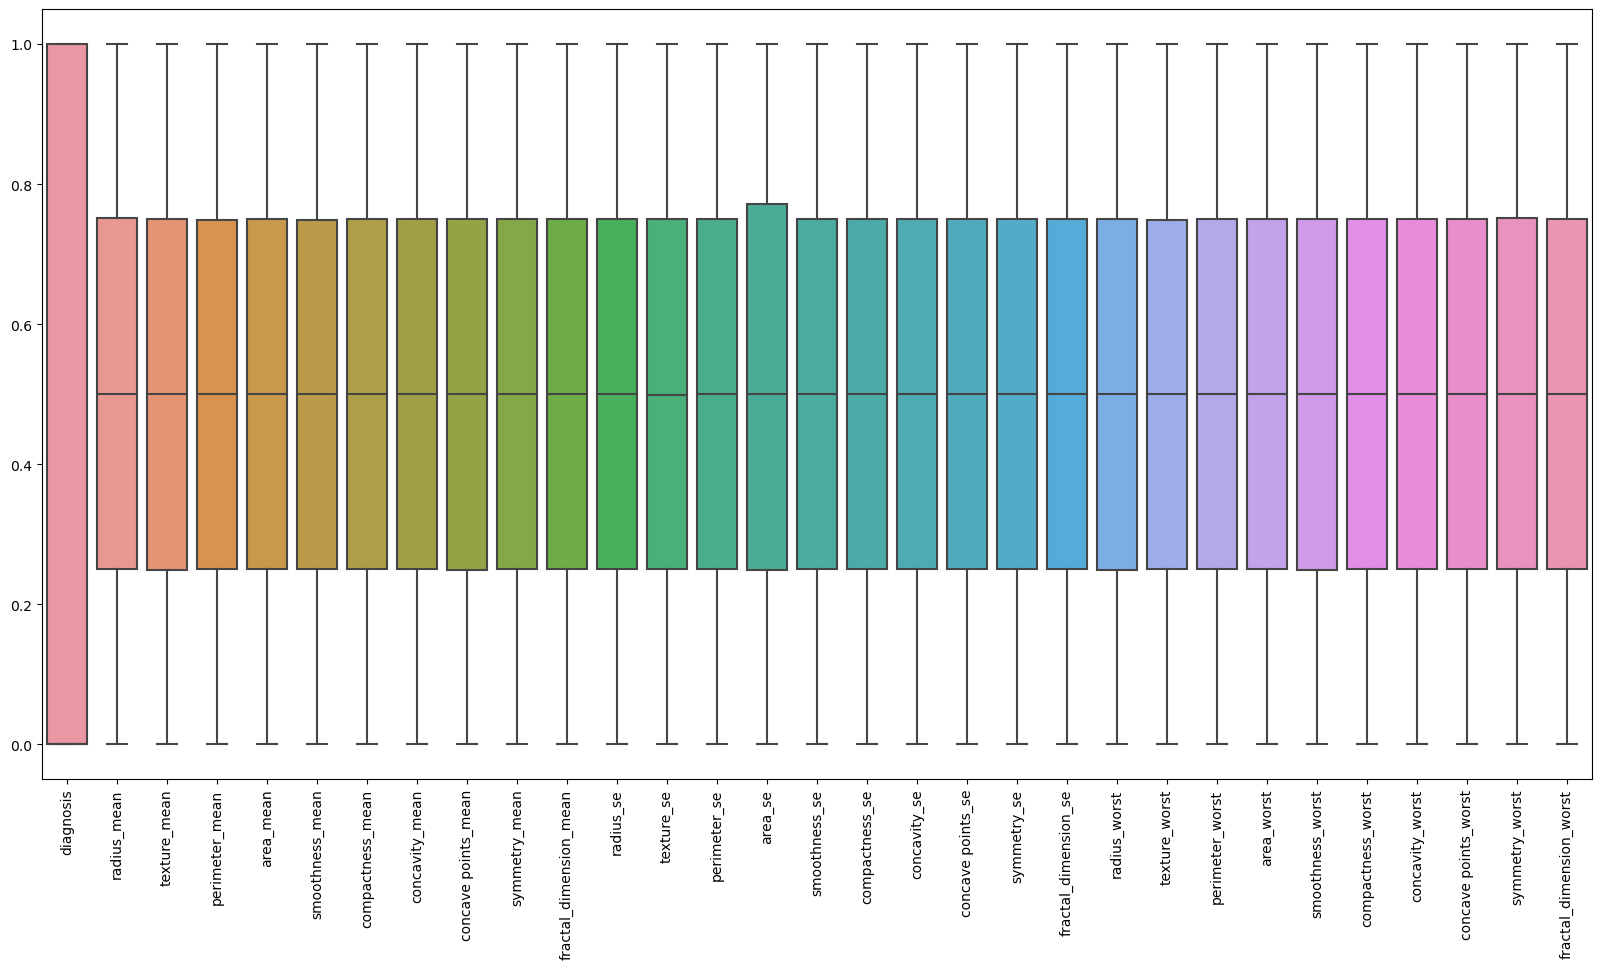

In [57]:
#boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(data=qt_df)
plt.xticks(rotation=90)
plt.show()

C:\Users\Ashish Gaurav\AppData\Local\Temp\ipykernel_6704\2805494309.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(qt_df[col])
C:\Users\Ashish Gaurav\AppData\Local\Temp\ipykernel_6704\2805494309.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(qt_df[col])
C:\Users\Ashish Gaurav\AppData\L

ValueError: num must be an integer with 1 <= num <= 30, not 31

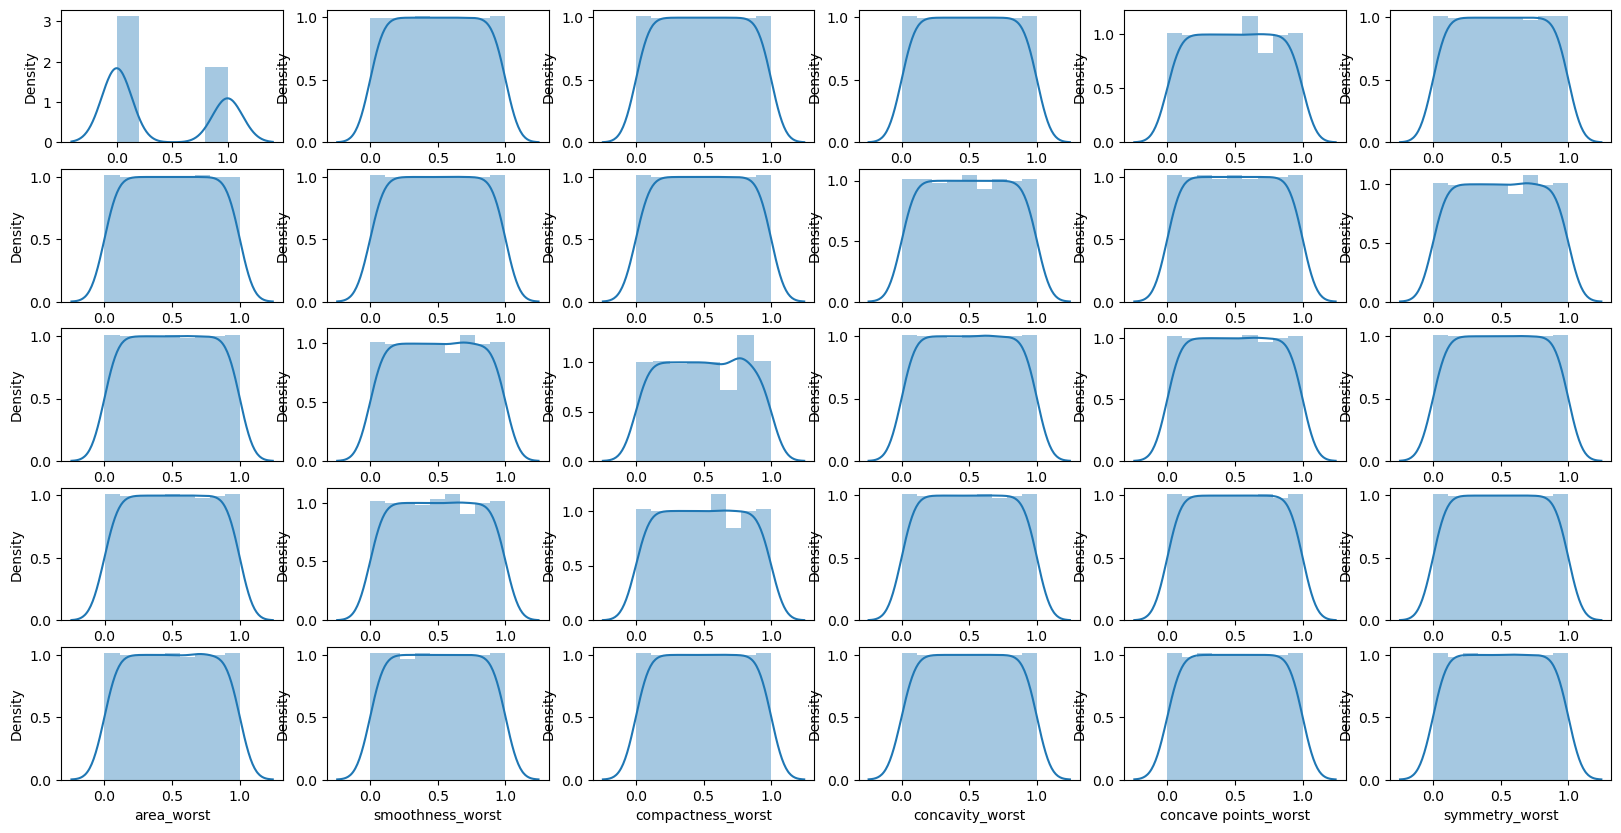

In [58]:
#distplot
plt.figure(figsize=(20, 10))
for i, col in enumerate(qt_df.columns):
    plt.subplot(5, 6, i+1)
    sns.distplot(qt_df[col])
plt.show()

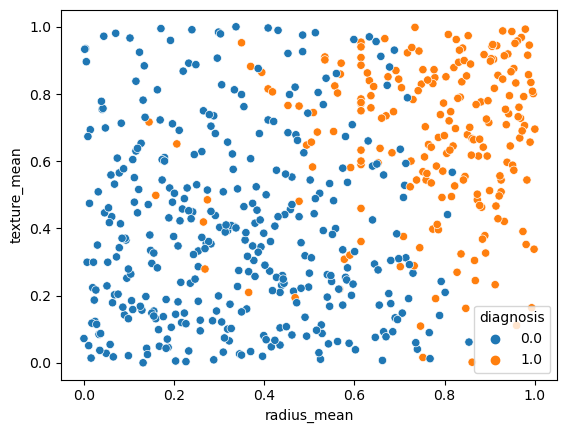

In [59]:
#scatterplot
sns.scatterplot(x='radius_mean', y='texture_mean', data=qt_df, hue='diagnosis')
plt.show()